In [87]:
import numpy as np
import matplotlib.pyplot as plt
import code_ARE 

# MODÉLISATION DE L'ÉVOLUTION DE LA RÉPARTITION D'INDIVIDUS RICHES SUR DES ZONES A, B ET C 

_____________________________________________________________________________________________________________________

À travers ce projet, on cherche à étudier l'évolution de la répartition des individus riches dans 3 zones A,B et C en tenant compte des différents facteurs qui influent sur cette évolution. 
La zone A est définie comme une zone peu stable (en sécurité et/ou éducation), la zone B est une zone fiable au niveau de la sécurité et de l'éducation mais possède des conditions fiscales peu avantageuses, et la zone C a les mêmes avantages que la zone B mais avec des conditions fiscales relativement intéressantes.
Les enjeux de ce dossier sont de comprendre les vrais impacts des critères sociaux, du pib et du taux d'imposition d'une zone. 

On pose alors le problème : comment évolue la répartition des individus riches (on considère les personnes ayant un patrimoine supérieur à 1 million d'euros), et quels sont les différents facteurs qui influent sur cette évolution ?

Pour tenter de répondre à ce problème nous allons voir tout d'abord les équations d'états des zones A et B, ensuite on étudiera les migrations entre chaque île, et pour finir on s'interresera à un modèle réaliste.
On appuiera notre raisonnement sur des données chiffrées issues des divers travaux de Thomas Piketty ainsi que sur plusieurs ressources publiques.

--------------------------------------------------------------------------------------------------------------------

*The aim of this project is to study the evolution of the distribution of rich individuals in 3 zones A, B and C, taking into account the various factors that influence this evolution.
Zone A is defined as a zone that is not stable (in terms of security and/or education), Zone B is a zone that is reliable in terms of security and education but has poor tax conditions, and zone C has the same advantages as zone B but with relatively attractive tax conditions.*

*The stakes in this file are to understand the real impact of social criteria, of GDP, or of the tax rate of a zone.*

*We then pose the following problem: how does the distribution of rich individuals change (we consider people with a wealth of more than 1 million euros), and what are the various factors that influence this evolution?*

*To try to answer this problem we will first look at the state equations of zones A and B, then we will study the migration rates between each island, and finally we will look at a realistic model.*

*Our reasoning will be based on figures from the various works of Thomas Piketty as well as on several public sources.*

---------------------------------------------------------------------------------------------------------------------

Il s’agissait de traiter de la « répartition des richesses », qui était le mot d’ordre initial du projet. La répartition des richesses est en effet un sujet phare de l’économie, et certainement l’un des plus débattus de la discipline. On peut la définir comme la manière dont est détenu le patrimoine à l’intérieur d’une société. Son étude, qui a donné lieu à différents modèles en opposition, consiste donc à analyser les inégalités inhérentes au concept afin d’établir un modèle permettant d’expliquer et/ou de prévoir son évolution. 

Les différentes théories produites sont souvent controversées car elles témoignent par leurs conclusions d’une certaine ligne politique plus ou moins marquée. Notre but était donc simplement de modéliser un système dynamique composé de plusieurs zones aux propriétés différentes en relation les unes avec les autres et d’étudier la répartition du patrimoine à l’intérieur de chacune d’entre elles. Nous nous sommes ainsi d’abord intéressés à un modèle « d’accumulation du capital », se basant sur une répartition initiale hétérogène des patrimoines dans deux zones distinctes. L’évolution du capital y aurait été régie par les revenus, les investissements, l’héritage... et l’interaction entre les deux zones. Cependant cela s’est avéré trop fastidieux et nous avons donc choisi de nous orienter vers l’étude d’un phénomène plus simple à implémenter/modéliser :  la répartition d’individus « riches » liée à des migrations.  

Notre travail se rapproche donc plus d’une étude de dynamique de population où l’évolution de la richesse, en ne tenant pas compte des migrations, a été réduite à des calculs simples décrivant l’évolution du nombre d’individus riches, en se basant sur des statistiques réelles. Nous avons donc considéré les trois zones évoquées précédemment en imposant que les migrations se fassent de A vers B et de B vers C et nous avons étudié les différences de comportement en faisant varier certains paramètres.

---------------------------------------------------------------------------------------------------------------------

### Partie 1 : 
   __ANALYSE DES ÉQUATIONS D'ÉTATS DES ZONES A ET B__

*L'équation qui suit représente l'évolution du nombre d'individus riches dans la zone A sans tenir compte des émigrations*

In [88]:
var_etat_A(2700, 1000)

1004

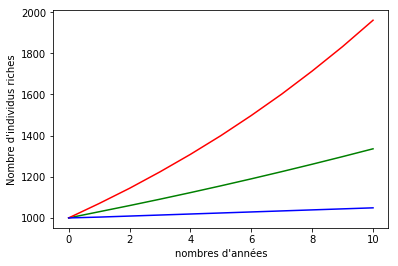

[1000, 1030, 1060, 1091, 1123, 1156, 1190, 1225, 1261, 1298, 1336]

In [111]:

import numpy as np
import matplotlib.pyplot as plt

#PIB1 : int 
PIB1 = 19000
#PIB2 : int 
PIB2 = 9000
#PIB3 : int 
PIB3 = 3000

#pop_init : int 
pop_init = 1000


#A : list[int] 
A = var_A(PIB1, pop_init, 10) 

#B : list[int] 
B = var_A(PIB2, pop_init, 10)

#C : list[int] 
C = var_A(PIB3, pop_init, 10)



plt.figure()
plt.plot(B, "g")
plt.plot(A, "r")
plt.plot(C, "b")
plt.ylabel("Nombre d'individus riches")
plt.xlabel("nombres d'années")

plt.show()

var_A(7000, 1000, 10) 

La courbe rouge représente l'évolution du nombres d'individus riches dans le cas où la zone A a un PIB supérieur à 15000 dollars par habitant. La courbe verte correspond au cas où le PIB est entre 4000 et 15000 dollars tandis que la courbe bleue caractérise un PIB inférieur à 4000 dollars par habitant. 

De part ce graphique, on remarque la forte influence du PIB par habitant d'une zone dans l'évolution du nombres d'individus riches dans la zone A. 

In [90]:
var_B(1000, 10)

[1000, 1100, 1210, 1331, 1464, 1610, 1771, 1948, 2142, 2356, 2591]

On cherche ici à visualiser l'évolution au sein des zones A et B en fonction du PIB, de la population initiale et du nombre d'années.

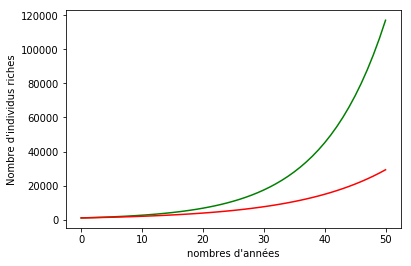

In [110]:
import numpy as np
import matplotlib.pyplot as plt

#PIB : int 
PIB = 19000
#pop_init : int 
pop_init = 1000


#A : list[int] 
A = var_A(PIB, pop_init, 50) 

#B : list[int] 
B = var_B(pop_init, 50)

plt.figure()
plt.plot(B, "g")
plt.plot(A, "r")
plt.ylabel("Nombre d'individus riches")
plt.xlabel("nombres d'années")

plt.show()



On a cherché à montrer que même dans le meilleur des cas de la zone A (PIB superieur à 15000 dollars par habitant), la croissance de la zone B reste nettement supérieure.

Le PIB par habitant joue donc un rôle important dans l'évolution du nombre d'individus riches, mais cette nette différence d'évolution entre ces 2 zones est sûrement aussi liée à d'autres facteurs comme le niveau d'éducation ou la sécurité par exemple.

### Partie 2 : 
   __ANALYSE DES MIGRATIONS DE A VERS B ET DE B VERS C__
      

In [92]:
 passage_de_A_B(25, 99, 10, 81)

0.32

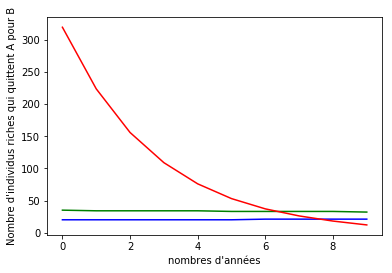

[320, 224, 156, 109, 76, 53, 37, 26, 18, 12]

In [112]:
import numpy as np
import matplotlib.pyplot as plt

#PIB : int 
PIB = 6000
#pop_init : int 
pop_init = 1000

#casA : list[int] 
casA = liste_depart(10, pop_init, 50, 50, 93, 91)

#casB : list[int] 
casB = liste_depart(10, pop_init, 50, 50, 75, 78)

#casC : list[int]
casC = liste_depart(10, pop_init, 10, 25, 95, 94)


plt.figure()
plt.plot(casA, "g")
plt.plot(casB, "b")
plt.plot(casC, "r")


plt.ylabel("Nombre d'individus riches qui quittent A pour B")
plt.xlabel("nombres d'années")

plt.show()

liste_depart(10, pop_init, 10, 25, 85, 85)

Ce graphique montre 3 cas différents :
    - le cas A, qui symbolise une migration d'une zone où le niveau de sécurité et d'éducation sont moyens vers une zone où ces niveaux sont très élevés;
    - Le cas B qui symbolise une migration d'une zone où le niveau de sécurité et d'éducation sont moyens vers une zone où ces niveaux sont plus élevés sans être idéaux;
    - Le cas C qui symbolise une migration d'une zone où le niveau de sécurité et d'éducation sont très bas vers une zone où ces niveaux sont très élevés;

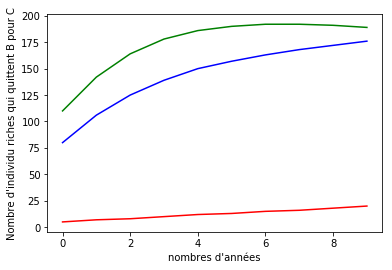

[110, 142, 164, 178, 186, 190, 192, 192, 191, 189]

In [114]:
import numpy as np
import matplotlib.pyplot as plt

#patrimoine : int 
patrimoine = 11
#pop_init : int 
pop_init = 1000
#ind_secuA : int 
ind_secuA = 15 
#ind_eduA : int 
ind_eduA = 25 
#ind_secuB : int 
ind_secuB = 85 
#ind_eduB : int 
ind_eduB = 85

#casA2 : list[int] 
casA2 = liste_depart_BC(10,pop_init, 0.6, 96, 98, 0.15, patrimoine)

#casB2 : list[int] 
casB2 = liste_depart_BC(10,pop_init, 0.45, 81, 78, 0.25, patrimoine)

#casC2 : list[int] 
casC2 = liste_depart_BC(10,pop_init, 0.6, 96, 98, 0.15, 5)



plt.figure()
plt.plot(casA2, "g")
plt.plot(casB2, "r")
plt.plot(casC2, "b")


plt.ylabel("Nombre d'individu riches qui quittent B pour C")
plt.xlabel("nombres d'années")

plt.show()


liste_depart_BC(10,pop_init, 0.6, 96, 98, 0.15, patrimoine)

Ce graphique montre 3 cas différents:
 -  le cas A2, qui symbolise une migration d'une zone où le taux d'impôt est très élevé vers une zone où ce taux est très faible avec des indices de sécurité et d'éducation très élevés;
 -  le cas B2, qui symbolise une migration d'une zone où le taux d'impôt est moyennement élevé vers une zone où ce taux est faible mais quand même significatif avec des indices de sécurité et d'éducation élevés;
 -  le cas C2, symbolise une zone identique à celle du cas A2 mais pour un individu qui n'est pas considéré comme très riche (plus de 10 Millions d'euros de patrimoine).

### Partie 3 : 
   __UN MODELE REALISTE__

*Le but de cette partie est de montrer l'importance de l'aspect économique dans la répartition des richesses.* 

In [101]:

#int : patrimoine
patrimoine =  6

#int : nb_A 
nb_A= 10000
#int : nb_B 
nb_B= 10000
#int : nb_C
nb_C= 10000

#int : PIB
PIB = 13000

#float : ind_eduA, ind_eduB, ind_secA, ind_secB
ind_eduA = 27.8
ind_eduB = 89
ind_secA = 37
ind_secB = 64

#float : taux_impotB, taux_impotC, ind_eduC, ind_secC
taux_impotB = 0.5
taux_impotC = 0.15
ind_eduC = 75.6
ind_secC = 88.4



In [102]:
evolution_tot(1)

{'A': 8961, 'B': 11679, 'C': 10700}

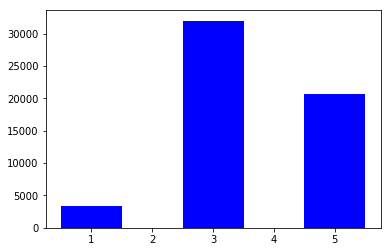

{'A': 3336, 'B': 31977, 'C': 20646}

In [118]:
import matplotlib.pyplot as plt
import numpy as np

#dict[char : int] : res
res = evolution_tot(10)

fig = plt.figure()

x = [1,2, 3, 4, 5]
height = [res["A"],0,  res["B"],0 ,res["C"]]
width = 1.0

plt.bar(x, height, width, color='b' )


plt.savefig('SimpleBar.png')
plt.show()

res


En faisant varier les différentes valeurs participant à ces équations, on voit rapidement que l’aspect social (éducation, sécurité…) est bien plus important que l’aspect économique dans la répartition des individus riches dans le monde.

Des pays tels que la Cote d’Ivoire ou L’Égypte, ayant une évolution interne du nombre d'individus riches croissante subissent le fort taux de départ pour les pays "occidentaux" comme la France, la Grande Bretagne ou encore les USA. Ainsi, le nombre d'individus riches dans les pays de la zone A est en baisse et cela est dû notamment à des facteurs géopolitiques (Guerres, Embargos,…).

Ensuite, la zone B pourrait représenter des pays tels que le nôtre où on note une forte croissance du nombre d'individus riches. Cependant, des raisons fiscales peuvent les pousser à quitter leur pays d’origine pour aller vers des pays économiquement plus avantageux tels que les pays de la zone C.

Ainsi, la recherche d’un pays plus sûr, avec un meilleur système éducatif et/ou économique sont les raisons principales qui poussent les personnes riches à quitter leur pays d’origine.


---------------------------------------------------------------------------------------------------------------------

# *Conclusion*


A la vue du projet, nous constatons que nous avons pu mettre en relief l’importance de chacun des facteurs d’évolution que nous avions jugé intéressants d’intégrer à notre modélisation. Par ailleurs, les résultats associés sont cohérents d’un point de vue informatique mais surtout logique : ils correspondent bien à ce qu’on imaginerait obtenir dans la réalité si on appliquait les mêmes simplifications. 

De plus, même en tenant compte de ces dernières, les conclusions obtenues fournissent une approximation plutôt vraisemblable des phénomènes d’évolution réels pour la zone B, notamment quand on compare les résultats d’évolution du projet avec ceux de la France (+12% par an) pour des paramètres similaires.  

Finalement, ce travail de recherche et de production a été l’occasion d’apprendre à adopter un point de vue pragmatique face à une nécessité de modéliser un phénomène particulier. Cela nous a permis de développer notre esprit critique aussi bien lors de l’écriture d’un code que dans la recherche d’informations ou dans la confrontation d’idées au sein d’un groupe, le but étant d’obtenir des résultat justes mais également exploitables et pertinents.


---------------------------------------------------------------------------------------------------------------------

## Bibliographie 

*ANNALES D’ÉCONOMIE ET DE STATISTIQUE. – N° 82 – 2006 - ENSAE*

"https://annals.ensae.fr/wp-content/uploads/pdf/n82/vol82-07.pdf"

*Indices de securité* 

"https://safearound.com/fr/danger-rankings/"

*DATA BASE de Thomas Piketty*

"https://wid.world/fr/donnees/"

*Indices d'education*

"https://www.topuniversities.com/system-strength-rankings/2016#sorting=rank+custom=rank+order=desc+search="

*Comparaison des taux d'impositions* 

-"http://www.estv2.admin.ch/f/dienstleistungen/steuerrechner/2018/ge.php"

-"https://www.gov.uk/government/organisations/hm-revenue-customs"

-"https://www3.impots.gouv.fr/simulateur/calcul_impot/2019/index.htm"